# BellaBeat Case Study


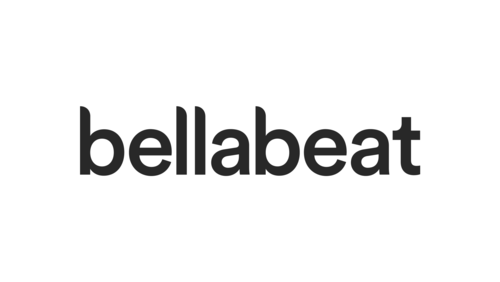

# How can a wellness technology company play it smart?

# Phase 1: ASK

**Introduction**

Bellabeat, is a high-tech manufacturer of health focused products for women.They believe that analyzing smart device fitness data could help unlock new growth opportunities for the company.

**Key Stakeholders**

* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer

* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

* Bellabeat marketing analytics team


**Business Task**

Analyze smart device fitness data from non-Bellabeat products in order to gain insight into trends influencing smart device usage. Determine how these trends could help influence Bellabeat marketing strategy.


# Phase 2: PREPARE

**Data Used**

The dataset I used for this analysis is FitBit Fitness Tracker Data (https://www.kaggle.com/arashnic/fitbit) publicly available through Kaggle.com. These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. 


**Installing and loading packages and libraries**

In [1]:

#install.packages("lubridate")
library(lubridate)
#install.packages("tidyverse") 
library(tidyverse)



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()



**Importing CSV files**

I am using the datasets daily activity and daily sleep since Bellabeats products focus on activity tracking and sleep tracking.

In [2]:
daily_activity_raw <- read.csv("../input/fit-bit-data/dailyActivity_merged.csv")
sleep_day_raw <- read.csv("../input/fit-bit-data/sleepDay_merged.csv")

**Summary Statistics**

In [3]:
head(daily_activity_raw)
head(sleep_day_raw)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


There are more unique participants in the daily activity dataset than the daily sleep dataset.

In [4]:
n_distinct(daily_activity_raw$Id)
n_distinct(sleep_day_raw$Id)

[1] 33

[1] 24

# Phase 3: PROCESS

Cleaning and Manipulating
* Remove any duplicates
* Remove missing values
* Rename activity date column to date
* Rename sleep day to date
* Format date 
* Create weekdays column
* Create new column total active minutes to sum all activity minutes


daily activity dataset.

In [5]:
#Find any duplicates
sum(duplicated(daily_activity_raw))

#Find missing values
sum(is.na(daily_activity_raw))

#Rename activitydate to date
colnames(daily_activity_raw)[colnames(daily_activity_raw) == "ActivityDate"] <- "Date"

#Format date
daily_activity_raw$Date <-  as.Date(daily_activity_raw$Date,format='%m/%d/%Y') 

#Add weekdays column
daily_activity_raw$Weekdays<- weekdays(daily_activity_raw$Date,abbr = FALSE)

[1] 0

[1] 0

sleep day dataset

In [6]:

#Find duplicates
sum(duplicated(sleep_day_raw))

#Find missing values
sum(is.na(sleep_day_raw))

#Rename ActivityDate column to Date
colnames(sleep_day_raw)[colnames(sleep_day_raw) == "SleepDay"] <- "Date"

#Format column to date type
sleep_day_raw$Date <-  as.Date(sleep_day_raw$Date,format='%m/%d/%Y') 

#Add new column with weekdays
sleep_day_raw$Weekdays<- weekdays(sleep_day_raw$Date,abbr = FALSE)

#Verify Sleep Day in date format
str(sleep_day_raw)


[1] 3

[1] 0

'data.frame':	413 obs. of  6 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ Date              : Date, format: "2016-04-12" "2016-04-13" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...
 $ Weekdays          : chr  "Tuesday" "Wednesday" "Friday" "Saturday" ...


Merging Datasets

In [7]:

combined_data <- merge(sleep_day_raw, daily_activity_raw, by= c("Id","Date","Weekdays"))

# Phase 4: ANALYZE

In order to analyze the data further we need to catergorize some variables and create some new columns.
* Sleep hours (<6 is underslept, 6-8 is ideal, and >8 is overslept)

In [8]:

combined_data <- combined_data %>%
  mutate(sleep_hours = case_when(
    TotalMinutesAsleep > 360 & TotalMinutesAsleep <= 480 ~ "Ideal",
    TotalMinutesAsleep > 480 ~ "Overslept",
    TRUE ~ "Underslept"))

* Number Of Daily Steps (<5k, 5k-10k, >10k)

In [9]:

combined_data <- combined_data %>%
  mutate(Daily_steps = case_when(
    TotalSteps > 5000 & TotalSteps <= 10000 ~ "5k - 10k",
    TotalSteps > 10000 ~ "> 10k",
    TRUE ~ "< 5k"))

* Total active minutes

In [10]:

#Add column total active minutes
combined_data <-combined_data  %>% 
  mutate(TotalActiveMinutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)


* Calories Burned (<1.5k, 1.5k - 2.5k, >2.5k)

In [11]:

combined_data <- combined_data %>%
  mutate(calorie_categories = case_when(
    Calories > 1500 & Calories <= 2500 ~ "1.5k - 2.5k",
    Calories > 2500 ~ "> 2.5k",
    TRUE ~ "< 1.5k"))

# Phase 5: SHARE

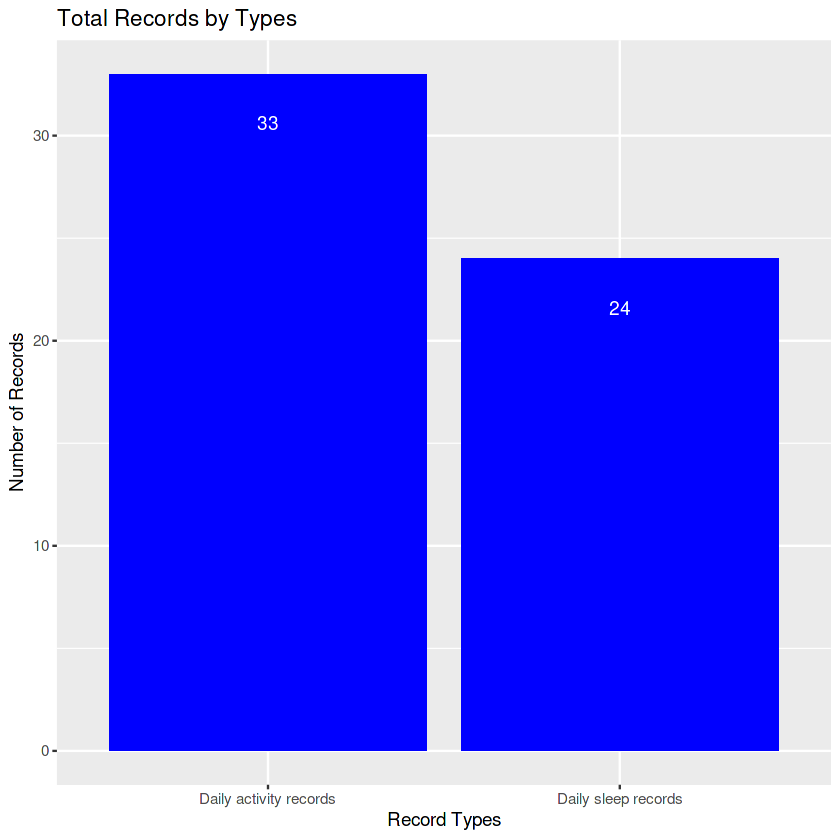

In [12]:
recored_type <- c("Daily activity records","Daily sleep records")
record_number <-c(n_distinct(daily_activity_raw$Id),n_distinct(sleep_day_raw$Id))
record_count <- data.frame(recored_type,record_number)

ggplot(record_count, aes(recored_type,record_number)) +
  geom_bar(stat= "identity", fill="blue")+ 
  geom_text(aes(label=record_number), vjust=4, color="white")+
  labs(title="Total Records by Types",  x= "Record Types", y="Number of Records")

More people recorded their daily activies with their fitbits with 33 distinct records. Whereas there were only 24 distinct sleep records recorded. 

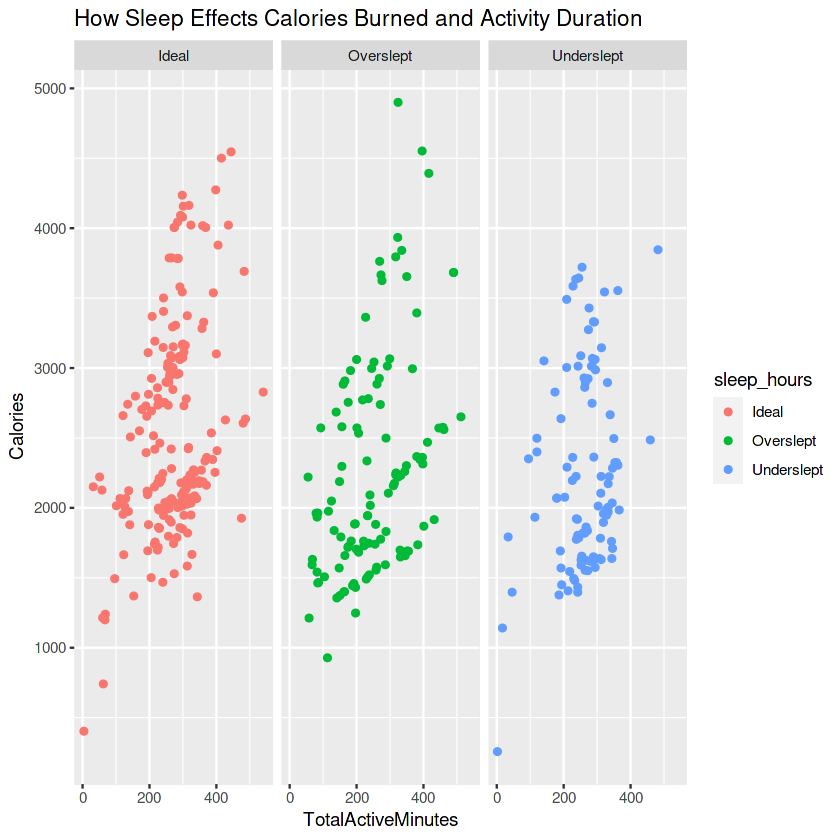

In [13]:

ggplot(data = combined_data) +
  geom_point(mapping = aes(x=TotalActiveMinutes, y=Calories, color=sleep_hours))+facet_wrap(~sleep_hours)+labs(title="How Sleep Effects Calories Burned and Activity Duration")    

Relationship between calories burned and total minutes active based on the number of hours each person slept.The people who slept for the ideal number of hours were able to burn more calories as well as stay active for a longer time than those who either overslept or underslept.  

In [14]:
average_daily_very_active_min <- combined_data %>%
  group_by(Weekdays) %>% 
  summarise_at(vars(VeryActiveMinutes),
               list(VeryActiveMinutes = mean))

In [15]:
average_daily_very_active_min$Weekdays <- ordered(average_daily_very_active_min$Weekdays, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))


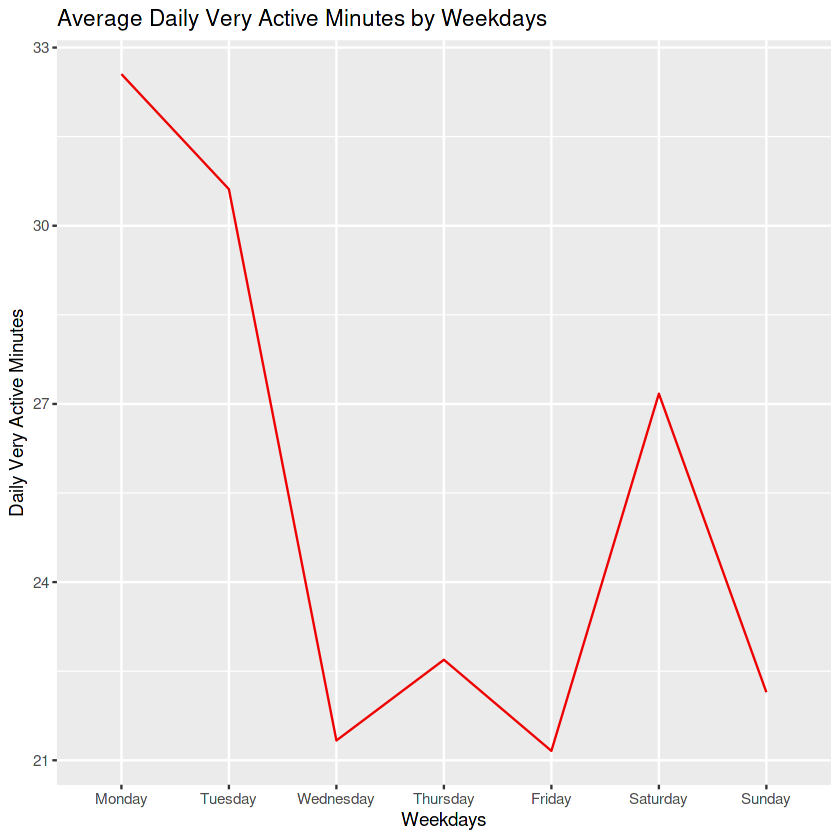

In [16]:
ggplot(average_daily_very_active_min, aes(x= Weekdays, y = VeryActiveMinutes, group = 1)) + 
  geom_line(colour="red2") +
  labs(title="Average Daily Very Active Minutes by Weekdays", x= "Weekdays", y="Daily Very Active Minutes")

Monday and Tuesday are the days people are doing the most intensive workouts while Wednesday and Friday are the least intensive.


# Phase 6: ACT

**Reccomendations**

* More Fitbit users are tracking activity data than sleep data which could indicate that people dont see sleep as important as daily activity in wellness tracking. By creating awareness on the effects of sleep on wellness and activity levels would be beneficial.

* People with ideal sleep (6-8hours) were able to burn more calories and stayed active for more minutes than those who either underslept or overslept. This adds to the importance of tracking sleep data and reccomending sleep based on the activity users plan on performing that day. Creating a marketing campaign on the benefits of getting 6-8 hours of sleep and its effects on activity and calories burned would be helpful to inform customers of the relationship. 

 * Users performed their most intensive workouts on mondays and tuesdays and then workout intesity fell over the rest of the week. By running targeted ads on mondays and tuesdays you can appeal to new customers who are performing intensive workouts and may be more likely to buy fitness related products. Also creating a workout prompt for the rest of the days of the week would help current users stay on track of their fitness goals.
